In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

%matplotlib inline

from datasets.synthetic.eight_gaussians import EightGaussians

# Eight Gaussians dataset

Synthetic multivariate regression dataset.

$X \sim U(\frac{1}{2}, \frac{5}{2})$ - oni-dimesional uniform between $0.5$ and $2.5$.

$Y = \frac{1}{k} \sum_{i=1}^{k} \mathcal{N}(c_i, \sigma^2) \cdot X$ - equaly-weighted Gaussian mixture with fixed variance, scaled by $X$. Means of the Gaussian mixture components $c_i$ are equally-spaced on the circle centered at the origin in the $Y$  coordinates.

In [2]:
eg = EightGaussians()

n_x = 20
n_y_per_x = 1000

X_ = eg.sample_covariates(n_points=n_x)
Y_ = eg.sample_conditional(n_points=n_y_per_x, x=X_)

X = X_.repeat_interleave(n_y_per_x, dim=0)
Y = Y_.reshape(-1, 2)

print(f"{X_.shape=}, {X.shape=}, {Y_.shape=}, {Y.shape=}")

x.shape=torch.Size([20, 1])
[[4 6 7 ... 6 4 5]
 [1 7 2 ... 4 0 4]
 [0 7 0 ... 5 6 2]
 [7 2 1 ... 1 2 1]
 [0 3 1 ... 3 4 3]]
selected_centers.shape=torch.Size([20, 1000, 2])
X_.shape=torch.Size([20, 1]), X.shape=torch.Size([20000, 1]), Y_.shape=torch.Size([20, 1000, 2]), Y.shape=torch.Size([20000, 2])


In [3]:
print(Y[:5])

tensor([[ 3.6839,  3.9765],
        [-3.6009,  4.3966],
        [-3.0694, -5.2488],
        [-5.1400,  0.3709],
        [-4.2917, -4.5931]])


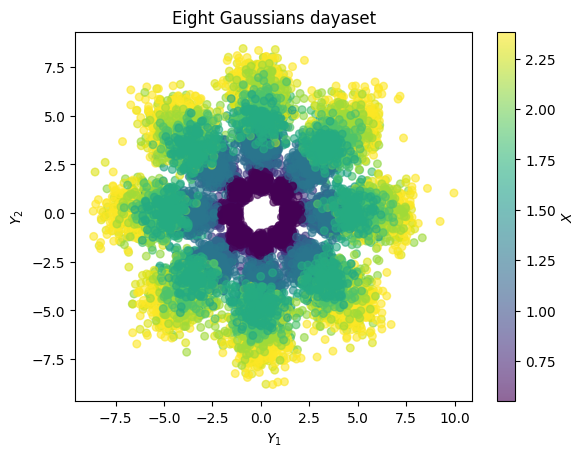

In [4]:
plt.figure()
plt.title('Eight Gaussians dayaset')
plt.scatter(Y[:, 0], Y[:, 1], c=X[:, 0], marker='o', s=30, alpha=0.6)
plt.xlabel(r"$Y_1$")
plt.ylabel(r"$Y_2$")
plt.colorbar(label=r"$X$")
plt.show()

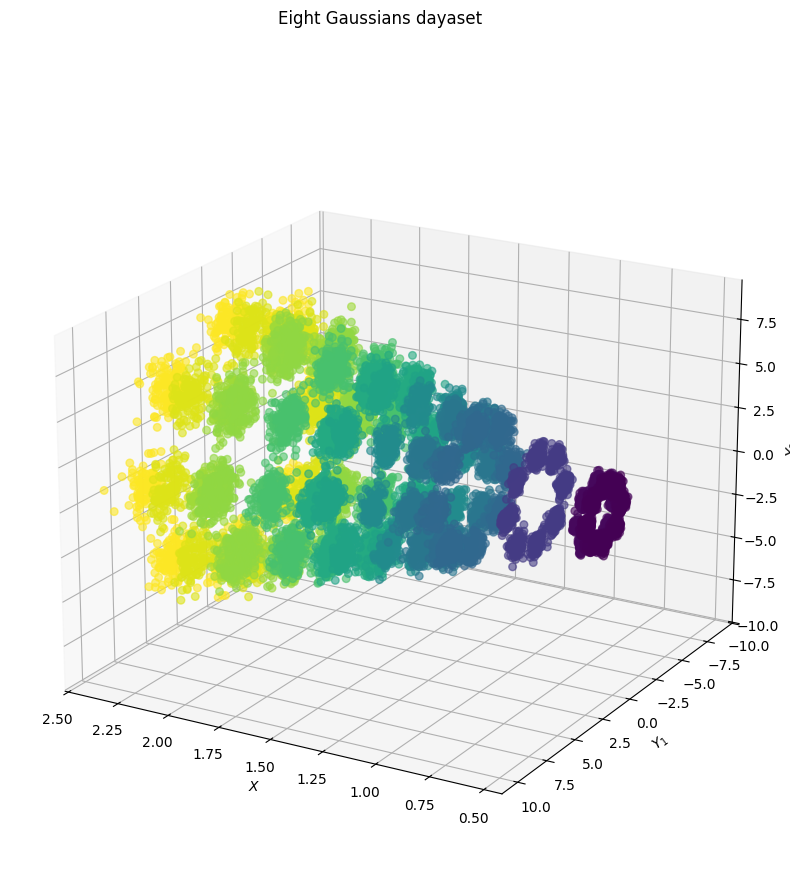

In [5]:
#print(f"Shape of x: {X.shape}")
#print(f"Shape of y: {Y.shape}")
#print(f"Min x value: {torch.min(X):.2f}, Max x value: {torch.max(X):.2f}")

fig = plt.figure(figsize=(12, 10))
fig.suptitle("Eight Gaussians dayaset")
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], Y[:, 0], Y[:, 1], c=X[:, 0], marker='o', s=30, alpha=0.6)

ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y_1$')
ax.set_zlabel(r'$Y_2$')

ax.grid(True)
ax.view_init(elev=20, azim=120)

plt.show()